In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
filepath_prices = '/Users/hermannviktor/Python/PycharmProjects/15.459-Fin-Data-Science-II/Project 2/Project_E_Q2_Prices.xlsx'
filepath_returns = '/Users/hermannviktor/Python/PycharmProjects/15.459-Fin-Data-Science-II/Project 2/Project_E_Q2_Returns.xlsx'

In [4]:
px_df = pd.read_excel(filepath_prices)
px_df = px_df.set_index('Date')

In [13]:
def scatterplotting(x_df, y_df, xlabel, ylabel,figname):
    idx = np.isfinite(x_df) & np.isfinite(y_df)
    a,b = np.polyfit(x_df[idx],y_df[idx],1)
    c = min(x_df[idx])
    d = max(x_df[idx])
    x = np.array([c, d])
    y = a * x + b
    textstr = 'y = {var}*x + {coef}'.format(var=a.round(3),coef=b.round(5))
    _ = plt.scatter(x_df[idx],y_df[idx], color='lightgreen')
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    _ = plt.plot(x,y,color='red', linewidth=2)
    _ = plt.title(textstr)
    plt.savefig(figname)
    plt.show()

# Preprocessing

In [22]:
px_df.shape

(2086, 7)

In [24]:
num_obs = 252*8
print(num_obs)

2016


In [25]:
print(px_df.isna().sum())

SP1_Index       69
SPX_Index       73
SPY_Equity      73
GLD_Equity      73
GLD_CMDTY        0
TVIX_Equity    301
VIX_Index       73
dtype: int64


# Prices

### SPX on SP1

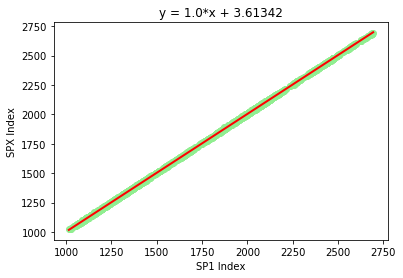

In [14]:
scatterplotting(px_df['SP1_Index'],px_df['SPX_Index'],'SP1 Index','SPX Index','spx_sp1_p')

### SPY on SPX

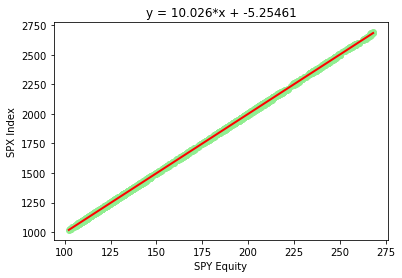

In [15]:
scatterplotting(px_df['SPY_Equity'],px_df['SPX_Index'],'SPY Equity','SPX Index','spx_spy_p')

### GLD on Gold Commodity

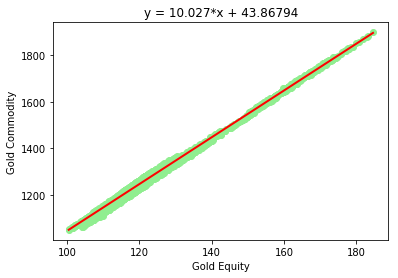

In [16]:
scatterplotting(px_df['GLD_Equity'],px_df['GLD_CMDTY'],'Gold Equity','Gold Commodity','gld_gldcmdty_p')

### TVIX on VIX

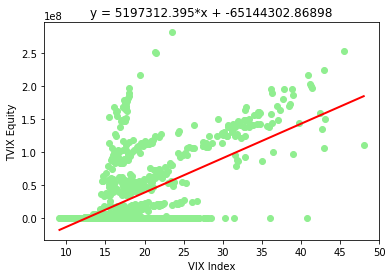

In [17]:
scatterplotting(px_df['VIX_Index'],px_df['TVIX_Equity'],'VIX Index','TVIX Equity','vix_tvix_p')

In [39]:
print(max(px_df['TVIX_Equity'][idx]))
print(min(px_df['TVIX_Equity'][idx]))
print(max(px_df['VIX_Index'][idx]))
print(min(px_df['VIX_Index'][idx]))

280875000.0
53.8
48.0
9.14


# Returns

In [43]:
ret_df = pd.read_excel(filepath_returns)
ret_df = ret_df.set_index('Date')

### SPX on SP1

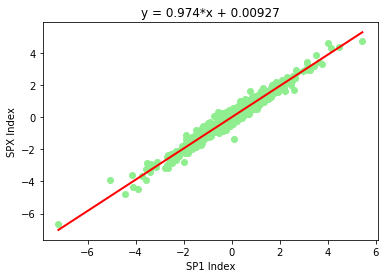

In [19]:
scatterplotting(ret_df['SP1_Index'],ret_df['SPX_Index'],'SP1 Index','SPX Index','spx_sp1_r')

In [32]:
idx = np.isfinite(ret_df['SP1_Index']) & np.isfinite(ret_df['SPX_Index'])
slope, intercept, r_value, p_value, std_err = stats.linregress(ret_df['SP1_Index'][idx],ret_df['SPX_Index'][idx])
print(r_value)

0.9836164928444999


### SPY on SPX

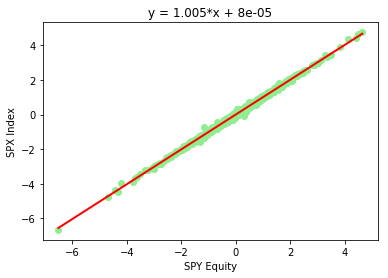

In [20]:
scatterplotting(ret_df['SPY_Equity'],ret_df['SPX_Index'],'SPY Equity','SPX Index','spx_spy_r')

In [34]:
idx = np.isfinite(ret_df['SPY_Equity']) & np.isfinite(ret_df['SPX_Index'])
slope, intercept, r_value, p_value, std_err = stats.linregress(ret_df['SPY_Equity'][idx],ret_df['SPX_Index'][idx])
print(r_value)

0.9986654933538792


### Gold on Gold Commodity

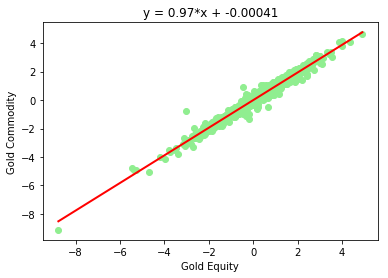

In [44]:
scatterplotting(ret_df['GLD_Equity'],ret_df['GLD_CMDTY'],'Gold Equity','Gold Commodity','gld_gldcmdty_r')

In [45]:
idx = np.isfinite(ret_df['GLD_Equity']) & np.isfinite(ret_df['GLD_CMDTY'])
slope, intercept, r_value, p_value, std_err = stats.linregress(ret_df['GLD_Equity'][idx],ret_df['GLD_CMDTY'][idx])
print(r_value)

0.9862273040824103


### TVIX on VIX

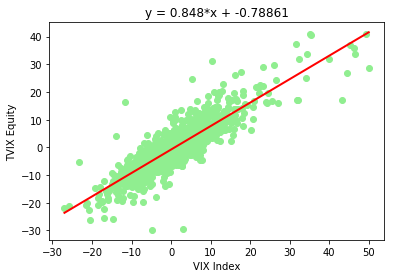

In [21]:
scatterplotting(ret_df['VIX_Index'],ret_df['TVIX_Equity'],'VIX Index','TVIX Equity','vix_tvix_r')

In [35]:
idx = np.isfinite(ret_df['VIX_Index']) & np.isfinite(ret_df['TVIX_Equity'])
slope, intercept, r_value, p_value, std_err = stats.linregress(ret_df['VIX_Index'][idx],ret_df['TVIX_Equity'][idx])
print(r_value)

0.8727606071668922


# Returns own calculation

In [5]:
ret_own_df = px_df.pct_change(periods = 1)

In [6]:
ret_own_df.head(4)

,SP1_Index,SPX_Index,SPY_Equity,GLD_Equity,GLD_CMDTY,TVIX_Equity,VIX_Index
Date,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,0.021753,NaN,NaN
2010-01-05,0.003101,0.003125,0.002647,-0.000911,-0.002854,NaN,-0.034431
2010-01-06,0.000618,0.000546,0.000704,0.016500,0.018247,NaN,-0.009819


In [10]:
ret_df = ret_df/100

In [11]:
diff = ret_own_df - ret_df

In [13]:
diff.mean(axis=0)

SP1_Index      1.143475e-07
SPX_Index     -8.333309e-05
SPY_Equity    -8.051356e-05
GLD_Equity     9.428383e-09
GLD_CMDTY               NaN
TVIX_Equity    6.294207e-09
VIX_Index     -6.278272e-09
dtype: float64